In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# Ensemble Methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
data = pd.read_csv('data/Sell-Out Data.csv', low_memory=False, thousands=',')

In [5]:
data.head()

,UNIT,DEALER,CHANNEL,SALES CHANNEL,REGION,WEEK,MONTH,QUARTER,YEAR,BRAND,CAPACITY,COMPRESSOR,COMPANY,QUANTITY
0,H-Wall,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Carrier,2.0hp,Variable Speed,CSG,4
1,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Kelvinator,1.0hp,Fixed Speed,CSG,2
2,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Variable Speed,CSG,2
3,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Fixed Speed,CSG,2
4,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Fixed Speed,CSG,2


### Data Cleaning

In [6]:
# Remove 99th percentile
# new_data = data[(data['QUANTITY'] <= data_quantity_quantiles['99%']) &
#                 (data['QUANTITY'] >= data_quantity_quantiles['1%'])]

# # Retain non-competitor data
# new_data = new_data[new_data['COMPANY'] != 'Competitors']
new_data = data[data['COMPANY'] == 'Competitors']

In [7]:
new_data.shape

(40734, 14)

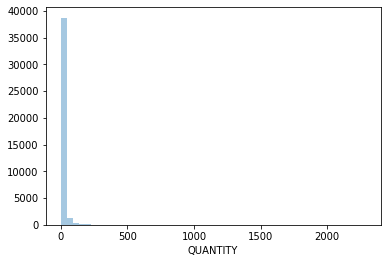

In [8]:
sns.distplot(new_data['QUANTITY'], kde=False)

In [9]:
new_data.head()

,UNIT,DEALER,CHANNEL,SALES CHANNEL,REGION,WEEK,MONTH,QUARTER,YEAR,BRAND,CAPACITY,COMPRESSOR,COMPANY,QUANTITY
3873,Wrac,ALSON-JAYSON,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,Sharp,0.5hp,Fixed Speed,Competitors,22
3874,Wrac,BODEGA GLASSWARE,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,Koppel,0.5hp,Fixed Speed,Competitors,6
3875,Wrac,BODEGA GLASSWARE,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,American Homes,1.0hp,Fixed Speed,Competitors,2
3876,Wrac,APPLIANCE CENTRUM GROUP,Traditional,VIS,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Kolin,2.5hp,Fixed Speed,Competitors,4
3877,Wrac,"DU EK SAM, INC.",Traditional,VIS,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Sharp,1.5hp,Fixed Speed,Competitors,22


### EDA

In [10]:
# How many are competitors-only, and company-owned
new_data.head()

,UNIT,DEALER,CHANNEL,SALES CHANNEL,REGION,WEEK,MONTH,QUARTER,YEAR,BRAND,CAPACITY,COMPRESSOR,COMPANY,QUANTITY
3873,Wrac,ALSON-JAYSON,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,Sharp,0.5hp,Fixed Speed,Competitors,22
3874,Wrac,BODEGA GLASSWARE,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,Koppel,0.5hp,Fixed Speed,Competitors,6
3875,Wrac,BODEGA GLASSWARE,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,American Homes,1.0hp,Fixed Speed,Competitors,2
3876,Wrac,APPLIANCE CENTRUM GROUP,Traditional,VIS,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Kolin,2.5hp,Fixed Speed,Competitors,4
3877,Wrac,"DU EK SAM, INC.",Traditional,VIS,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Sharp,1.5hp,Fixed Speed,Competitors,22


In [11]:
# Percent competitor data vs company data (quantities sold)
data.groupby('COMPANY')['QUANTITY'].sum()

COMPANY
CSG            821626
Competitors    773026
Name: QUANTITY, dtype: int64

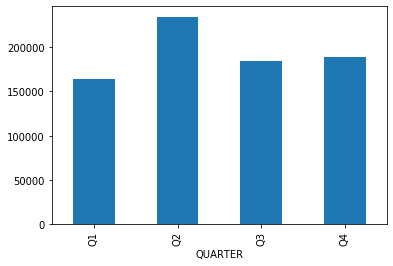

In [12]:
# Units sold per quarter
new_data.groupby('QUARTER')['QUANTITY'].sum().plot(kind='bar')

In [42]:
new_data.groupby('QUARTER')['QUANTITY'].sum()/(new_data.groupby('QUARTER')['QUANTITY'].sum().sum())

QUARTER
Q1    0.213050
Q2    0.303998
Q3    0.238758
Q4    0.244195
Name: QUANTITY, dtype: float64

In [14]:
new_data.groupby('QUARTER')['QUANTITY'].sum().to_csv('competitor_quarterly_sales.csv')

C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


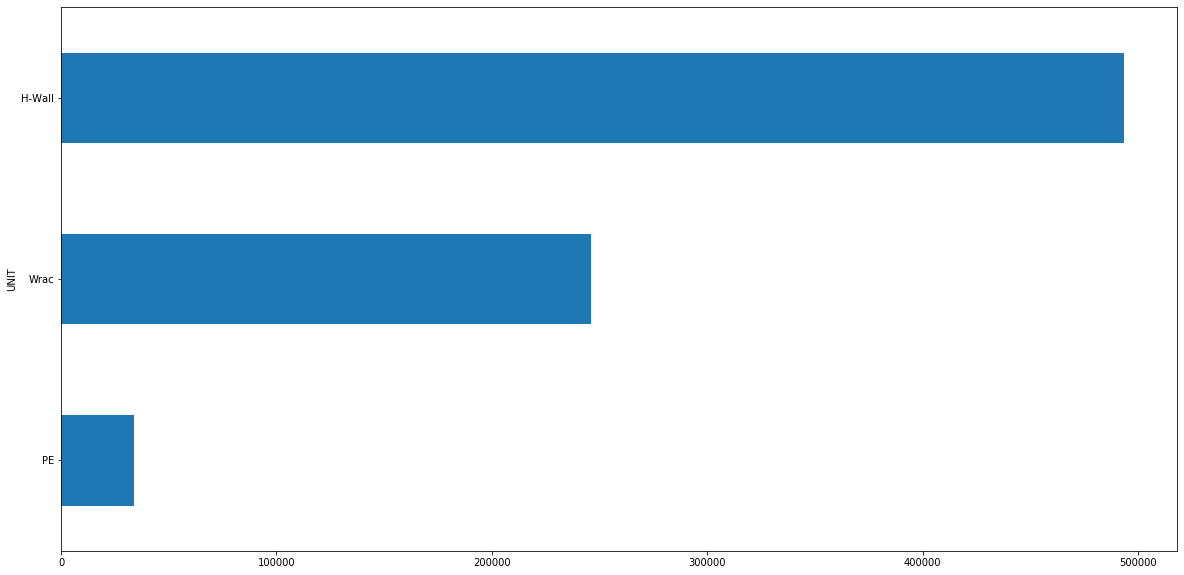

In [15]:
# Units sold per Unit Type
per_type_df = new_data.groupby('UNIT')['QUANTITY'].sum().sort_values(ascending=False)[:10]
per_type_df.plot('barh', figsize=(20, 10))
plt.gca().invert_yaxis()

In [16]:
per_type_df/per_type_df.sum()

UNIT
H-Wall    0.638285
Wrac      0.318027
PE        0.043688
Name: QUANTITY, dtype: float64

In [17]:
per_type_df.to_csv('competitor_per_type.csv')

C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


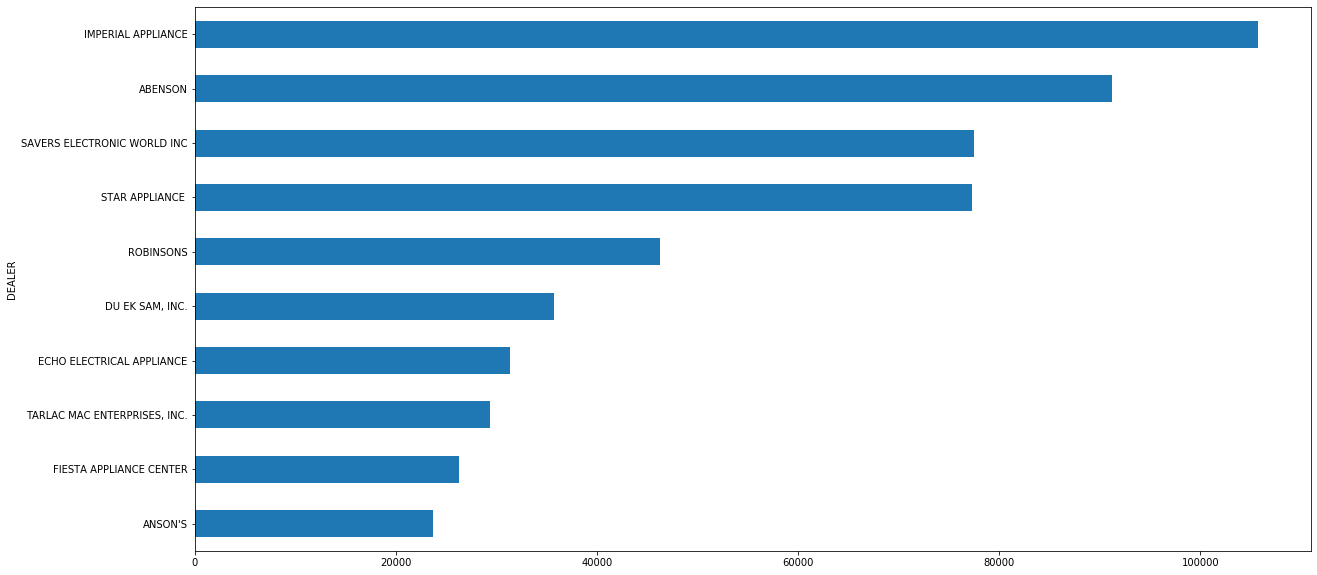

In [18]:
# Units sold per Dealer
dealer_type = new_data.groupby('DEALER')['QUANTITY'].sum().sort_values(ascending=False)[:10]
dealer_type.plot('barh', figsize=(20, 10))
plt.gca().invert_yaxis()

In [19]:
new_data.groupby('DEALER')['QUANTITY'].sum().sort_values(ascending=False)/(new_data.groupby('DEALER')['QUANTITY'].sum().sort_values(ascending=False).sum())

DEALER
IMPERIAL APPLIANCE                     0.136707
ABENSON                                0.117969
SAVERS ELECTRONIC WORLD INC            0.100189
STAR APPLIANCE                         0.099919
ROBINSONS                              0.059858
DU EK SAM, INC.                        0.046169
ECHO ELECTRICAL APPLIANCE              0.040512
TARLAC MAC ENTERPRISES, INC.           0.038005
FIESTA APPLIANCE CENTER                0.034007
ANSON'S                                0.030595
EMCOR INC.                             0.030083
RL APPLIANCE                           0.028808
QUALITY APPLIANCE YAP                  0.025017
MAGIC APPLIANCE CENTER                 0.021941
PRICEWISE MARKETING CORPORATION        0.019074
CSI WAREHOUSE CLUB                     0.018151
AUTOMATIC                              0.016259
BALINGIT HOME FURNISHING 3B & A        0.016082
ADDESSA CORPORATION                    0.016019
WESTERN                                0.015618
DIMDI CENTRE, INC                

In [20]:
dealer_type.to_csv('competitor_dealer_type.csv')

C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [21]:
# Percent Modern vs traditional
new_data.groupby('CHANNEL')['QUANTITY'].sum()#/data['CHANNEL'].shape

CHANNEL
Modern Trade    265698
Traditional     507328
Name: QUANTITY, dtype: int64

In [22]:
new_data['QUANTITY'].sum()

773026

In [23]:
# Diffent Regions
sales_channel_df = new_data.groupby('SALES CHANNEL')['QUANTITY'].sum().sort_values(ascending=False)#/data['SALES CHANNEL'].shape

In [24]:
sales_channel_df/sales_channel_df.sum()

SALES CHANNEL
Modern Trade    0.281239
VIS             0.270261
NCL             0.213351
MIN             0.142442
GMA/SL          0.092707
Name: QUANTITY, dtype: float64

In [25]:
sales_channel_df.to_csv('competitor_sales_channel.csv')

C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [26]:
## Percent diff units
new_data.groupby('UNIT')['QUANTITY'].sum()#/data['UNIT'].shape

UNIT
H-Wall    493411
PE         33772
Wrac      245843
Name: QUANTITY, dtype: int64

C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


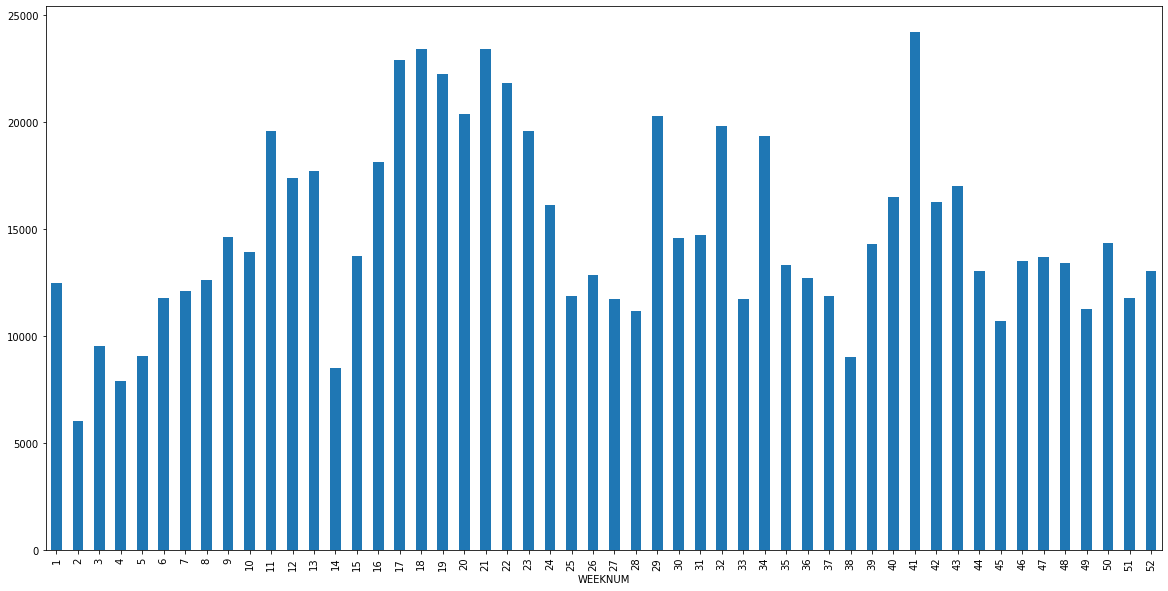

In [27]:
# Units sold per week

# Get weeknumber by parsing text
new_data['WEEKNUM'] = new_data['WEEK'].apply(lambda x: int(x.split('-')[0].split(' ')[1]))
weekly_sales_df = new_data.groupby('WEEKNUM')['QUANTITY'].sum()

# Groupby week to see weekly units sold
weekly_sales_df.plot(kind='bar', figsize=(20,10))

In [28]:
weekly_sales_df.describe()

count       52.000000
mean     14865.884615
std       4413.919683
min       6034.000000
25%      11832.500000
50%      13708.500000
75%      17825.250000
max      24191.000000
Name: QUANTITY, dtype: float64

In [29]:
weekly_sales_df.to_csv('competitor_weekly_sales.csv')

C:\Users\Charlene Chace\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [30]:
# Units sold per Month

# Groupby month to see weekly units sold
new_data.groupby('MONTH')['QUANTITY'].sum()#.plot(kind='bar', figsize=(20,10))

MONTH
Apr-18     63296
Aug-18     64185
Dec-18     50444
Feb-18     51095
Jan-18     44999
Jul-18     72519
Jun-18     60419
Mar-18     68599
May-18    111283
Nov-18     51304
Oct-18     87021
Sep-18     47862
Name: QUANTITY, dtype: int64

In [31]:
# Most sold AC unit in Abenson? 
new_data[new_data['DEALER']=='ABENSON'].groupby('UNIT')['QUANTITY'].sum()#/data['DEALER'].shape

UNIT
H-Wall    59557
PE          688
Wrac      30948
Name: QUANTITY, dtype: int64

In [32]:
# Types of units sold for all using one line of code
sold_units_per_dealer_per_type = new_data.groupby(['DEALER','UNIT'])['QUANTITY'].sum()
sold_units_per_dealer_per_type

DEALER                               UNIT  
ABENSON                              H-Wall    59557
                                     PE          688
                                     Wrac      30948
ADDESSA CORPORATION                  H-Wall    10798
                                     PE          190
                                     Wrac       1395
ALL HOME                             H-Wall     3702
                                     PE           76
                                     Wrac       1027
ALSON-JAYSON                         H-Wall     1824
                                     PE          267
                                     Wrac        886
ANSON'S                              H-Wall    16307
                                     PE          723
                                     Wrac       6621
APPLIANCE CENTRUM GROUP              H-Wall     1520
                                     PE           38
                                     Wrac       2303
AS

In [33]:
# Brand
new_data.head(1)

,UNIT,DEALER,CHANNEL,SALES CHANNEL,REGION,WEEK,MONTH,QUARTER,YEAR,BRAND,CAPACITY,COMPRESSOR,COMPANY,QUANTITY,WEEKNUM
3873,Wrac,ALSON-JAYSON,Traditional,GMA/SL,SOUTH LUZON,Week 1-2018,Jan-18,Q1,2018,Sharp,0.5hp,Fixed Speed,Competitors,22,1


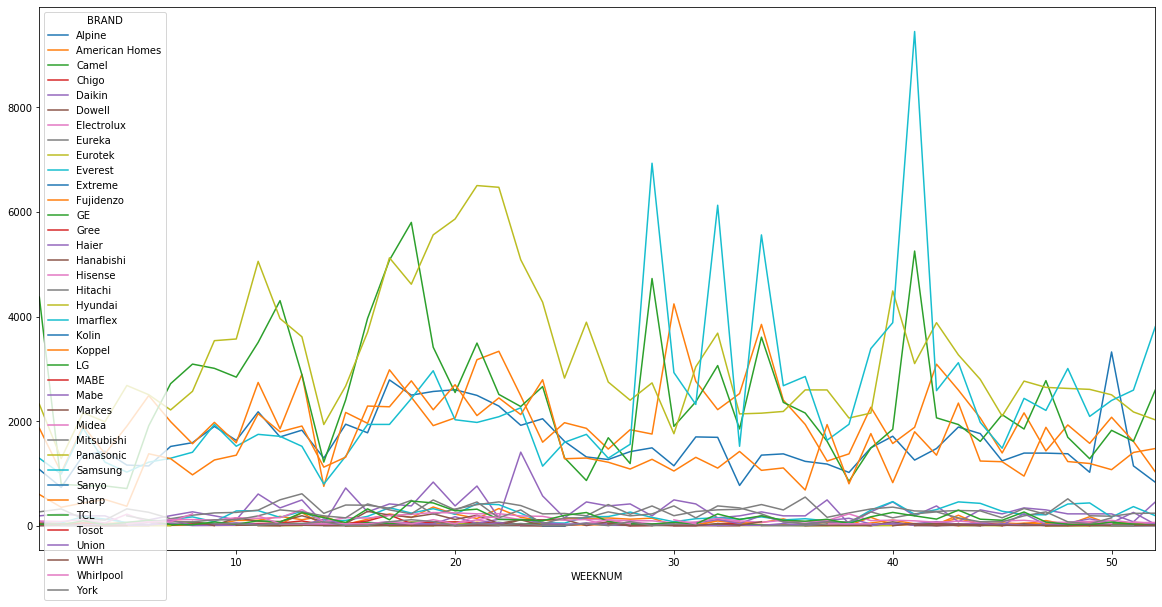

In [34]:
pd.pivot_table(new_data, values='QUANTITY', index='WEEKNUM', columns='BRAND', aggfunc='sum').plot(figsize=(20, 10))

In [35]:
pd.pivot_table(new_data, values='QUANTITY', index='WEEKNUM', columns='BRAND', aggfunc='sum').to_csv('competitor_brand_sales.csv')

In [36]:
new_data.groupby(['WEEKNUM','BRAND'])['QUANTITY'].sum()

WEEKNUM  BRAND         
1        American Homes      57
         Daikin             190
         Everest             34
         Fujidenzo           10
         GE                  33
                           ... 
52       Panasonic         2025
         Samsung           3807
         Sharp             1477
         TCL                 12
         WWH                 12
Name: QUANTITY, Length: 1254, dtype: int64

### Feature Engineering

In [37]:
# Get Features
features = new_data.drop(['QUANTITY'], axis=1)

# Dummify
X = pd.get_dummies(features)

# Get Targets
y = new_data['QUANTITY']

In [38]:
X.shape

(40734, 189)

In [39]:
X.shape, y.shape

((40734, 189), (40734,))

### Modelling

In [40]:
# Remove 99th percentile
new_data = new_data[(new_data['QUANTITY'] <= data_quantity_quantiles['99%']) &
                (new_data['QUANTITY'] >= data_quantity_quantiles['1%'])]

NameError: name 'data_quantity_quantiles' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

model = RandomForestRegressor(n_estimators=300, random_state=42)
# model = GradientBoostingRegressor(n_estimators=300, random_state=42)

# Fit Model
%time model.fit(X_train, y_train)

### Feature Importances

In [ ]:
feature_importances_df = pd.DataFrame({"Features": X.columns,
                                       "Feature Importance": model.feature_importances_}
                                     ).sort_values('Feature Importance', ascending=False).set_index('Features')

# Top 20 Features
feature_importances_df[:20].plot(kind='barh')
plt.gca().invert_yaxis()

### RMSE

In [ ]:
# Train Predictions
y_pred_train = model.predict(X_train).astype(int)

# Test Predictions
y_pred = model.predict(X_test).astype(int)

# Train RMSE
rmse_score_train = np.sqrt(mse(y_pred_train, y_train))

# Test RMSE
rmse_score = np.sqrt(mse(y_pred, y_test))

In [ ]:
rmse_score, rmse_score_train

### Compare Predictions from Actual Price

In [ ]:
prediction_real_df = pd.DataFrame({"Real Sales Quantity": y_test, "Predicted Sales Quantity": y_pred})

In [ ]:
prediction_real_df.plot.scatter('Real Sales Quantity', 'Predicted Sales Quantity')

Predictions are pretty conservative, meaning, they are generally predicting low sale count.

### Another Metric

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

### Save Model

In [ ]:
pd.options.display.max_columns = 999

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model/cortex_model.sav')

In [ ]:
X_train.head()

In [ ]:
features

In [ ]:
# Education Level
unit_values = pd.Series(data['UNIT'].unique()).str.strip()
unit_dummies = pd.get_dummies(unit_values)

# unit_sample = st.sidebar.selectbox("AC Unit", unit_values.values.tolist())

unit_sample_dummies = (unit_dummies.loc[np.where(unit_values.values == 'H-Wall')[0]]
                                  .values.tolist()[0])

In [ ]:
unit_dummies

In [ ]:
unit_sample_dummies + unit_sample_dummies

In [ ]:
# Unit Level
data = new_data.copy()
unit_values = pd.Series(data['UNIT'].unique()).str.strip()
unit_dummies = pd.get_dummies(unit_values)

# unit_sample = st.sidebar.selectbox("AC Unit", unit_values.values.tolist())

unit_sample_dummies = (unit_dummies.loc[np.where(unit_values.values == 'H-Wall')[0]]
                                  .values.tolist()[0])


# Dealer Level
dealer_values = pd.Series(data['DEALER'].unique()).str.strip()
dealer_dummies = pd.get_dummies(dealer_values)

# dealer_sample = st.sidebar.selectbox("Dealer", dealer_values.values.tolist())

dealer_sample_dummies = (dealer_dummies.loc[np.where(dealer_values.values == 'ABENSON')[0]]
                                  .values.tolist()[0])


# Channel Level
channel_values = pd.Series(data['CHANNEL'].unique()).str.strip()
channel_dummies = pd.get_dummies(channel_values)

# channel_sample = st.sidebar.selectbox("Channel", channel_values.values.tolist())

channel_sample_dummies = (channel_dummies.loc[np.where(channel_values.values == 'Modern Trade')[0]]
                                  .values.tolist()[0])


# Sales Channel Level
sales_channel_values = pd.Series(data['SALES CHANNEL'].unique()).str.strip()
sales_channel_dummies = pd.get_dummies(sales_channel_values)

# sales_channel_sample = st.sidebar.selectbox("Sales Channel", sales_channel_values.values.tolist())

sales_channel_sample_dummies = (sales_channel_dummies.loc[np.where(sales_channel_values.values == 'Modern Trade')[0]]
                                  .values.tolist()[0])


# Region Level
region_values = pd.Series(data['REGION'].unique()).str.strip()
region_dummies = pd.get_dummies(region_values)

# region_sample = st.sidebar.selectbox("Region", region_values.values.tolist())

region_sample_dummies = (region_dummies.loc[np.where(region_values.values == 'VISAYAS')[0]]
                                  .values.tolist()[0])


# Brand Level
brand_values = pd.Series(data['BRAND'].unique()).str.strip()
brand_dummies = pd.get_dummies(brand_values)

# brand_sample = st.sidebar.selectbox("Brand", brand_values.values.tolist())

brand_sample_dummies = (brand_dummies.loc[np.where(brand_values.values == 'Carrier')[0]]
                                  .values.tolist()[0])

# Capacity Level
cap_values = pd.Series(data['CAPACITY'].unique()).str.strip()
cap_dummies = pd.get_dummies(cap_values)

# cap_sample = st.sidebar.selectbox("Capacity", cap_values.values.tolist())

cap_sample_dummies = (cap_dummies.loc[np.where(cap_values.values == '2.0hp')[0]]
                                  .values.tolist()[0])


# Compressor Level
comp_values = pd.Series(data['COMPRESSOR'].unique()).str.strip()
comp_dummies = pd.get_dummies(comp_values)

# comp_sample = st.sidebar.selectbox("Compressor", comp_values.values.tolist())

comp_sample_dummies = (comp_dummies.loc[np.where(comp_values.values == 'Variable Speed')[0]]
                                  .values.tolist()[0])

# Prediction
# st.title("Predicted Sales")

# Load Model
model = joblib.load('model/cortex_model.sav')

# Input
sample_features = (unit_sample_dummies + dealer_sample_dummies + channel_sample_dummies + sales_channel_sample_dummies +
                   region_sample_dummies + brand_sample_dummies + cap_sample_dummies + comp_sample_dummies + [1])



In [ ]:
len(sample_features)

In [ ]:
channel_values